In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

ERROR:root:File `'functions.py'` not found.


In [175]:
pd.set_option('display.max_columns', None)
label= pd.read_csv('traininglabels.csv')
value= pd.read_csv('trainingvalues.csv')
df = pd.merge(label, value, on='id')

In [176]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [177]:
df.shape

(59400, 41)

In [178]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Management 

In [179]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

No null values in manangement. Scheme management represents who is opertating the waterpoint. Management represents how the the water point is manages. Therefore we can drop the 'scheme managment' column.

In [180]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

### Status Group

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


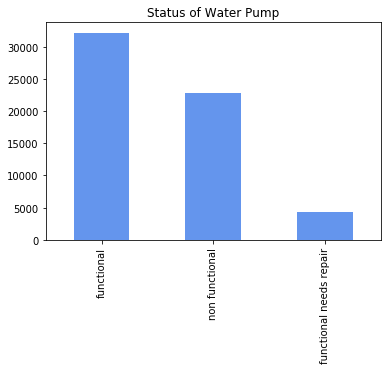

In [181]:
df['status_group'].value_counts().plot(kind='bar', color='cornflowerblue',title='Status of Water Pump')
print(df['status_group'].value_counts())

### Installers

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64


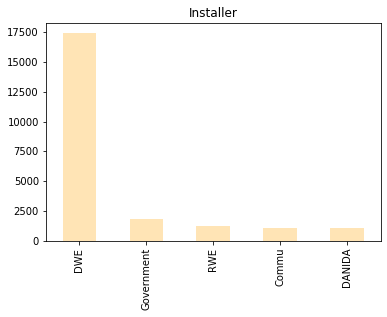

In [182]:
df['installer'].value_counts().nlargest(n=5).plot(kind='bar',color='moccasin',title='Installer')
print(df['installer'].value_counts().nlargest(n=5))

### Funders

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64


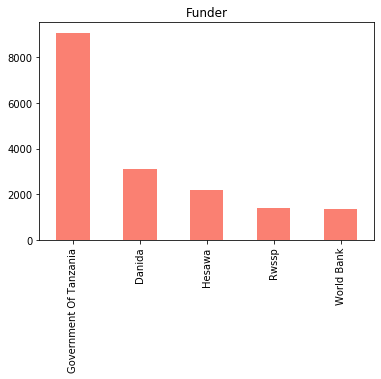

In [183]:
df['funder'].value_counts().nlargest(n=5).plot(kind='bar',color='salmon',title='Funder')
print(df['funder'].value_counts().nlargest(n=5))

In [184]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

Analyzing the payment method for the water pump, we can see a majority of the pumps do not require a payment for the user.

### Regions

Iringa         5294
Shinyanga      4982
Mbeya          4639
Kilimanjaro    4379
Morogoro       4006
Name: region, dtype: int64


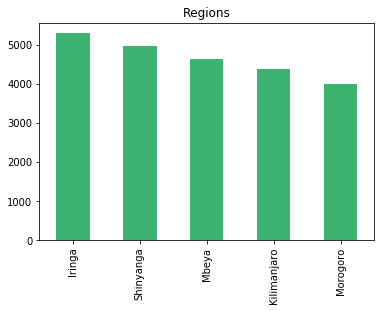

In [185]:
df['region'].value_counts().nlargest(n=5).plot(kind='bar',color='mediumseagreen',title='Regions')
print(df['region'].value_counts().nlargest(n=5))

[Text(0, 0, 'Iringa'),
 Text(0, 0, 'Mara'),
 Text(0, 0, 'Manyara'),
 Text(0, 0, 'Mtwara'),
 Text(0, 0, 'Kagera'),
 Text(0, 0, 'Tanga'),
 Text(0, 0, 'Shinyanga'),
 Text(0, 0, 'Tabora'),
 Text(0, 0, 'Pwani'),
 Text(0, 0, 'Ruvuma'),
 Text(0, 0, 'Kilimanjaro'),
 Text(0, 0, 'Rukwa'),
 Text(0, 0, 'Mwanza'),
 Text(0, 0, 'Kigoma'),
 Text(0, 0, 'Lindi'),
 Text(0, 0, 'Dodoma'),
 Text(0, 0, 'Arusha'),
 Text(0, 0, 'Mbeya'),
 Text(0, 0, 'Singida'),
 Text(0, 0, 'Morogoro'),
 Text(0, 0, 'Dar es Salaam')]

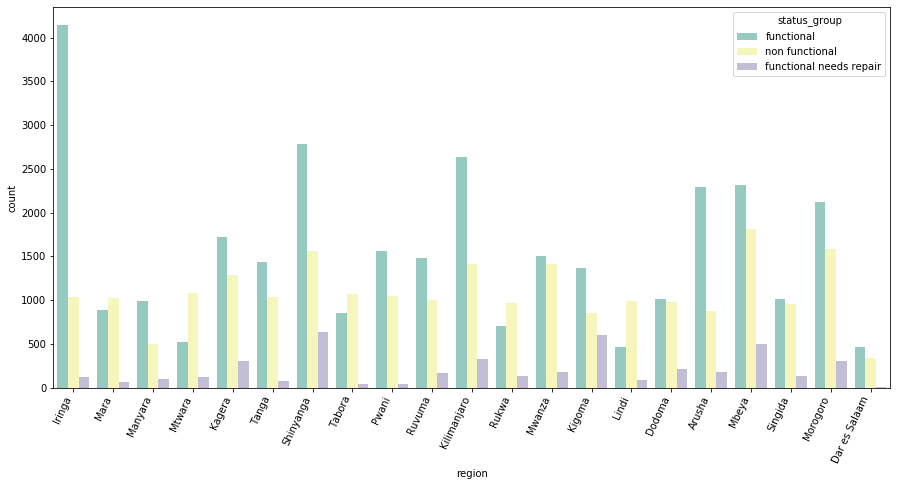

In [186]:
plt.figure(figsize=(15,7))
regions = sns.countplot(x='region', hue="status_group", data=df, palette ='Set3')
regions.set_xticklabels(regions.get_xticklabels(),rotation=65, horizontalalignment='right')


### Extraction

In [187]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [188]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

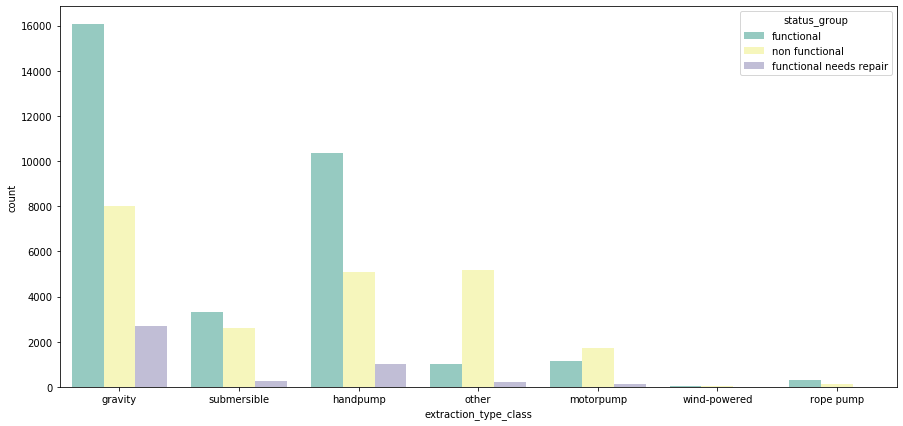

In [189]:
plt.figure(figsize=(15,7))
sns.countplot(x='extraction_type_class', hue="status_group", data=df, palette ='Set3')

The way in which the water is extracted from the pump can have a great cause to its status and quality. 

### Quality/Quantity 

In [190]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [191]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [192]:
df.groupby(['water_quality','status_group']).count() 

id  amount_tsh  date_recorded  \
water_quality      status_group                                                
coloured           functional                 246         246            246   
                   functional needs repair     54          54             54   
                   non functional             190         190            190   
fluoride           functional                 151         151            151   
                   functional needs repair     13          13             13   
                   non functional              36          36             36   
fluoride abandoned functional                   6           6              6   
                   non functional              11          11             11   
milky              functional                 438         438            438   
                   functional needs repair     14          14             14   
                   non functional             352         352            352   
salty              functional                2220        2220           2220   
                   functional needs repair    225         225            225   
                   non functional            2411        2411           2411   
salty abandoned    functional                 174         174            174   
                   functional needs repair     72          72             72   
                   non functional              93          93             93   
soft               functional               28760       28760          28760   
                   functional needs repair   3904        3904           3904   
                   non functional           18154       18154          18154   
unknown            functional                 264         264            264   
                   functional needs repair     35          35             35   
                   non functional            1577        1577           1577   

                                            funder  gps_height  installer  \
water_quality      status_group                                             
coloured           functional                  202         246        202   
                   functional needs repair      27          54         27   
                   non functional              162         190        162   
fluoride           functional                  139         151        136   
                   functional needs repair       9          13          9   
                   non functional               33          36         31   
fluoride abandoned functional                    6           6          6   
                   non functional               11          11         11   
milky              functional                  424         438        422   
                   functional needs repair      14          14         14   
                   non functional              350         352        349   
salty              functional                 2183        2220       2182   
                   functional needs repair     219         225        219   
                   non functional             2401        2411       2400   
salty abandoned    functional                  167         174        167   
                   functional needs repair      72          72         72   
                   non functional               92          93         92   
soft               functional                26943       28760      26937   
                   functional needs repair    3521        3904       3518   
                   non functional            17481       18154      17493   
unknown            functional                  214         264        207   
                   functional needs repair      18          35         18   
                   non functional             1077        1577       1071   

                                            longitude  latitude  wpt_name  \
water_quality      status_group            

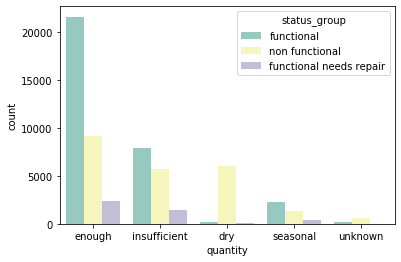

In [193]:
sns.countplot(x='quantity', hue="status_group", data=df, palette ='Set3')

### Waterpoint / Source Groups 

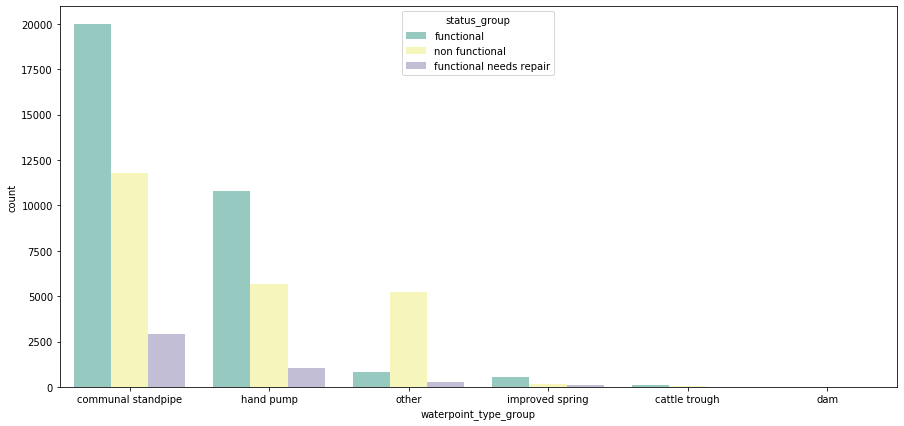

In [194]:
plt.figure(figsize=(15,7))
sns.countplot(x='waterpoint_type_group', hue="status_group", data=df, palette ='Set3')

In [195]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [196]:
df.groupby(['source_class','source_type','status_group']).count() 

id  amount_tsh  \
source_class source_type          status_group                                 
groundwater  borehole             functional                5919        5919   
                                  functional needs repair    508         508   
                                  non functional            5522        5522   
             shallow well         functional                8324        8324   
                                  functional needs repair    957         957   
                                  non functional            7543        7543   
             spring               functional               10592       10592   
                                  functional needs repair   1276        1276   
                                  non functional            5153        5153   
surface      dam                  functional                 253         253   
                                  functional needs repair     24          24   
                                  non functional             379         379   
             rainwater harvesting functional                1386        1386   
                                  functional needs repair    314         314   
                                  non functional             595         595   
             river/lake           functional                5627        5627   
                                  functional needs repair   1233        1233   
                                  non functional            3517        3517   
unknown      other                functional                 158         158   
                                  functional needs repair      5           5   
                                  non functional             115         115   

                                                           date_recorded  \
source_class source_type          status_group                             
groundwater  borehole             functional                        5919   
                                  functional needs repair            508   
                                  non functional                    5522   
             shallow well         functional                        8324   
                                  functional needs repair            957   
                                  non functional                    7543   
             spring               functional                       10592   
                                  functional needs repair           1276   
                                  non functional                    5153   
surface      dam                  functional                         253   
                                  functional needs repair             24   
                                  non functional                     379   
             rainwater harvesting functional                        1386   
                                  functional needs repair            314   
                                  non functional                     595   
             river/lake           functional                        5627   
                                  functional needs repair           1233   
                                  non functional                    3517   
unknown      other                functional                         158   
                                  functional needs repair              5   
                                  non functional                     115   

                                                           funder  gps_height  \
source_class source_type          status_group                                  
groundwater  borehole             functional                 5492        5919   
                                  functional needs repair     441         508   
                                  non functional             5187        5522   
             shallow well         functional                 8123  

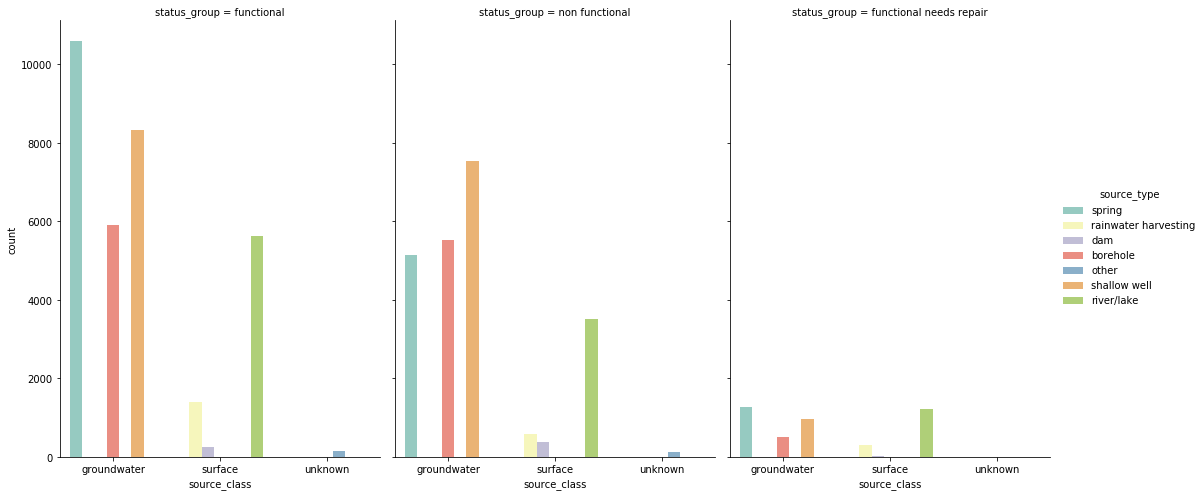

In [197]:
sns.catplot(x="source_class", hue="source_type", col="status_group",
                data=df, kind="count",palette ='Set3',
                height=7, aspect=.7)

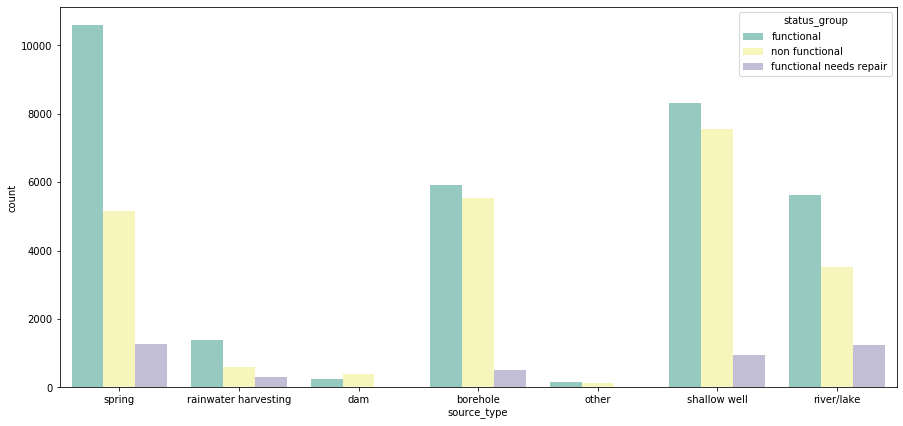

In [198]:
plt.figure(figsize=(15,7))
sns.countplot(x='source_type', hue="status_group", data=df, palette ='Set3')

In [199]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [200]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [201]:
df[(df['status_group'] == 'non functional') & (df['quantity'] =='insufficient')]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
28,19685,0.0,2013-03-05,Government Of Tanzania,1443,District council,37.611126,-3.263526,Kwa Kibakaya,0,Pangani,Kiyao,Kilimanjaro,3,1,Rombo,Mengwe Manda,1,True,GeoData Consultants Ltd,Company,Kitukuni water supply,True,2000,gravity,gravity,gravity,company,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
55,68724,20.0,2013-02-22,Muwsa,766,MUWSA,37.348169,-3.356538,Environment,0,Pangani,Dhobi Street,Kilimanjaro,3,6,Moshi Urban,Njoro,1,True,GeoData Consultants Ltd,Water authority,Njoro Water Supply,True,2008,gravity,gravity,gravity,water authority,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional
63,8265,0.0,2013-05-03,Adra,1365,Adra /Community,36.947451,-3.350026,Thadayo,0,Pangani,Ulkusare,Arusha,2,7,Meru,Kikatiti,130,True,GeoData Consultants Ltd,VWC,Maambreni gravity water supply,True,2002,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
70,21990,200.0,2011-03-05,Government Of Tanzania,303,RWE,35.818981,-8.934950,Kwampalanji,0,Rufiji,Mtakuja,Morogoro,5,3,Kilombero,Utengule,280,True,GeoData Consultants Ltd,NaN,NaN,True,1995,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,unknown,unknown,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59361,35991,0.0,2012-10-30,Tlc,0,TLC,32.087611,-5.148770,Mifugoni,0,Lake Tanganyika,Mifugoni,Tabora,14,4,Urambo,Imalamakoye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
59372,29940,0.0,2012-10-31,Tlc,0,TLC,32.058548,-5.052101,Kwa Mzee Kamanya,0,Lake Tanganyika,Urambo Magharibi,Tabora,14,4,Urambo,Urambo,0,True,GeoData Consultants Ltd,Private operator,NaN,True,0,other,other,other,private operator,commercial,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
59377,43986,0.0,2012-10-23,Government Of Tanzania,0,Government,33.437012,-4.423594,Fpct,0,Internal,Hospital,Tabora,14,2,Igunga,Nkinga,0,True,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe multiple,communal standpipe,non functional
59381,67885,0.0,2011-03-16,Mkinga Distric Coun,0,DWE,38.835001,-4.880204,Mijohoroni,0,Pangani,Mtakuja A,Tanga,4,8,Mkinga,Maramba,360,True,GeoData Consultants Ltd,VWC,Magati water schem,True,1992,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


In [202]:
df[(df['status_group'] == 'non functional')]['region'].value_counts()

Mbeya            1816
Morogoro         1587
Shinyanga        1558
Kilimanjaro      1417
Mwanza           1417
Kagera           1285
Mtwara           1080
Tabora           1066
Pwani            1043
Tanga            1038
Iringa           1030
Mara             1023
Ruvuma            996
Lindi             993
Dodoma            983
Rukwa             966
Singida           954
Arusha            881
Kigoma            850
Manyara           500
Dar es Salaam     341
Name: region, dtype: int64

After creating visuals now I will simply clean up the extra columns that will not be needed 

In [203]:
df.drop(columns=['wpt_name','num_private','subvillage','region_code', 'recorded_by',
            
                 'scheme_name','quantity_group','source_type',
                 'ward', 
                 'source_class','quality_group', 'quantity_group',
                'extraction_type','extraction_type_group','management_group','payment_type',
                 'waterpoint_type_group'],inplace=True )

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  scheme_name            31234 non-null  object 
 15  pe

In [204]:
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
district_code               0
lga                         0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment                     0
water_quality               0
quantity                    0
source                      0
waterpoint_type             0
status_group                0
dtype: int64

In [245]:
df['funder'].fillna('0', inplace=True)
df['scheme_management'].fillna('0', inplace=True)
df['installer'].fillna('0', inplace=True)

Realizing I do not need the public meeting anfd permit column 

In [208]:
df.drop(columns=['public_meeting','permit'],inplace=True)

In [246]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
population               0
scheme_management        0
construction_year        0
extraction_type_class    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
operational_year         0
dtype: int64

In [247]:
df.shape

(59400, 24)

I noticed there is a column of what year the water pump was contructed and the when the pump information was enteredin the data. Therefore I can create a column of the functioning years of the pump. 

In [219]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [220]:
df['operational_year'] = df.date_recorded.dt.year - df.construction_year

Converted the status group to categorial variable

In [228]:
targetstatus = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(targetstatus)

In [229]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109,VWC,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,0,12
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,280,Other,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,3
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,250,VWC,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,0,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2,27
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,0,other,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,125,Water Board,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,0,14
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,56,VWC,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,0,15
59397,37057,0.0,2011-04-11,other,0,other,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,0,VWC,0,handpump,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,2011
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,0,VWC,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump,0,2011


In [230]:
df.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
basin                            object
region                           object
district_code                     int64
lga                              object
population                        int64
scheme_management                object
construction_year                 int64
extraction_type_class            object
management                       object
payment                          object
water_quality                    object
quantity                         object
source                           object
waterpoint_type                  object
status_group                      int64
operational_year                  int64
dtype: object

In [249]:
df['installer'].value_counts()

DWE                           17402
other                          3655
Government                     1825
RWE                            1206
Commu                          1060
                              ...  
Zuber Mihungo                     1
Makonde water Population          1
VILLAGE COUNCIL .ODA              1
Farm Africa                       1
MKONGO BUILDING CONTRACTOR        1
Name: installer, Length: 2146, dtype: int64

In [252]:
df['installer'].unique()

array(['Roman', 'GRUMETI', 'World vision', ..., 'Dina', 'brown',
       'SELEPTA'], dtype=object)

In [232]:
column = df.select_dtypes(exclude=[np.number])

In [233]:
list(column)

['date_recorded',
 'funder',
 'installer',
 'basin',
 'region',
 'lga',
 'scheme_management',
 'extraction_type_class',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [255]:
dummy_df = pd.get_dummies(df, columns = [
 'basin',
 'region',
 'lga',
 'scheme_management',
 'extraction_type_class',
 'management',df
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type'])

In [256]:
dummy_df.shape

(59400, 237)

In [257]:
# Check for new columns
dummy_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'district_code', 'population',
       ...
       'source_shallow well', 'source_spring', 'source_unknown',
       'waterpoint_type_cattle trough', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other'],
      dtype='object', length=237)

In [260]:
clean_df = dummy_df

I will be using this cleaned dataset for modeling

In [261]:
clean_df.to_csv('clean_train.csv', index=False)

In [259]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,population,scheme_management,construction_year,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,operational_year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,109,VWC,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,0,12
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,280,Other,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,3
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,250,VWC,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,0,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,VWC,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2,27
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,0,other,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,125,Water Board,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,0,14
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,56,VWC,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,0,15
59397,37057,0.0,2011-04-11,other,0,other,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,0,VWC,0,handpump,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,2011
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,0,VWC,0,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump,0,2011
